# 탐색적 데이터 분석

In [1]:
# import libraries
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import random

## 이상치 및 결측치 처리

### 데이터 읽기

In [62]:
data_org = pd.read_csv('data04_stock.csv')    # 결측치가 없는 원 데이터
data = pd.read_csv('data05_stock_missing.csv')  # 결측치가 포함된 데이터

In [63]:
data

,Price,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,Up,7.730,0.0,0.000,6.686,2.343,13.911,8.046,0.860,0.0,...,2.558,8.821,3.535,8.967,8.774,5.439,9.543,11.034,9.181,0.860
1,Up,8.200,0.0,0.943,6.858,1.726,11.958,8.084,0.943,0.0,...,3.355,7.909,5.485,9.105,8.587,4.020,9.837,10.642,9.901,0.547
2,Up,6.795,0.0,0.358,6.634,3.992,13.537,8.577,0.883,0.0,...,4.764,8.402,5.176,9.207,7.596,4.892,8.354,10.672,8.964,0.000
3,Up,4.646,0.0,1.212,5.838,4.213,13.294,7.651,0.000,0.0,...,2.922,8.830,3.779,9.541,7.969,4.749,7.960,10.888,9.076,0.525
4,Up,8.970,0.0,0.000,6.613,8.457,13.756,7.402,0.000,0.0,...,5.496,7.241,3.654,7.852,7.982,4.485,9.426,10.249,10.373,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Down,6.136,0.0,2.064,6.527,0.000,13.376,7.393,1.374,0.0,...,3.029,7.729,5.559,8.771,6.901,2.315,8.345,9.908,9.429,1.374
196,Down,7.828,0.0,0.737,6.651,1.415,14.668,9.751,2.585,0.0,...,3.585,9.332,6.197,8.853,8.218,5.799,8.486,10.933,9.368,0.000
197,Down,6.010,0.0,0.000,7.636,4.134,13.434,8.198,1.145,0.0,...,1.936,8.359,3.182,7.115,7.698,4.432,8.562,10.738,8.962,0.489
198,Down,7.585,0.0,0.000,5.989,1.409,13.420,8.987,0.000,0.0,...,4.099,9.510,4.545,10.240,7.298,5.209,8.890,11.634,10.108,0.499


In [64]:
# 수치형 데이터만으로 분석
# 범주형도 가능하지만 좀 더 복잡함
data_org = data_org.drop('Price',axis=1)
data = data.drop('Price',axis=1)
data.head()

,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,val0010,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,7.730,0.0,0.000,6.686,2.343,13.911,8.046,0.860,0.0,9.630,...,2.558,8.821,3.535,8.967,8.774,5.439,9.543,11.034,9.181,0.860
1,8.200,0.0,0.943,6.858,1.726,11.958,8.084,0.943,0.0,10.010,...,3.355,7.909,5.485,9.105,8.587,4.020,9.837,10.642,9.901,0.547
2,6.795,0.0,0.358,6.634,3.992,13.537,8.577,0.883,0.0,9.604,...,4.764,8.402,5.176,9.207,7.596,4.892,8.354,10.672,8.964,0.000
3,4.646,0.0,1.212,5.838,4.213,13.294,7.651,0.000,0.0,10.049,...,2.922,8.830,3.779,9.541,7.969,4.749,7.960,10.888,9.076,0.525
4,8.970,0.0,0.000,6.613,8.457,13.756,7.402,0.000,0.0,9.277,...,5.496,7.241,3.654,7.852,7.982,4.485,9.426,10.249,10.373,0.000


### 결측치 처리

In [65]:
data.isna()  # 모든 값에 대하여 NA (결측치)가 존재하는지 확인

,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,val0010,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
data.isna().sum(axis=0)  # 각 변수에 대하여 결측치가 몇 개인지 확인

val0001    0
val0002    5
val0003    7
val0004    0
val0005    0
          ..
val1996    0
val1997    0
val1998    5
val1999    0
val2000    0
Length: 2000, dtype: int64

In [67]:
data.isna().sum(axis=1)  # 각 샘플에 대하여 결측치가 몇 개인지 확인

0       0
1       0
2       0
3       0
4       0
       ..
195    37
196     0
197     0
198     0
199     0
Length: 200, dtype: int64

In [68]:
print('# of variables with missing:', (data.isna().sum(axis=0)>0).sum() )
print('# of samples with missing:', (data.isna().sum(axis=1)>0).sum() )
print('# of total missing:',data.isna().sum().sum() )

# of variables with missing: 176
# of samples with missing: 37
# of total missing: 1043


In [69]:
# 표본 제거를 통한 결측치 처리
data_clean = data.dropna(axis=0)
print( data_clean.shape )
print('# of total missing:',data_clean.isna().sum().sum() )

(163, 2000)
# of total missing: 0


In [70]:
# 변수 제거를 통한 결측치 처리
data_clean = data.dropna(axis=1)
print( data_clean.shape )
print('# of total missing:',data_clean.isna().sum().sum() )

(200, 1824)
# of total missing: 0


In [71]:
data.mean()

val0001     7.182520
val0002     0.104718
val0003     0.501575
val0004     6.310105
val0005     2.885235
             ...    
val1996     4.396070
val1997     8.612665
val1998    10.430769
val1999     9.741645
val2000     0.535915
Length: 2000, dtype: float64

In [72]:
# 결측치 대치
data_clean = data.fillna( data.mean() )
print( data_clean.shape )
print('# of total missing:',data_clean.isna().sum().sum() )

(200, 2000)
# of total missing: 0


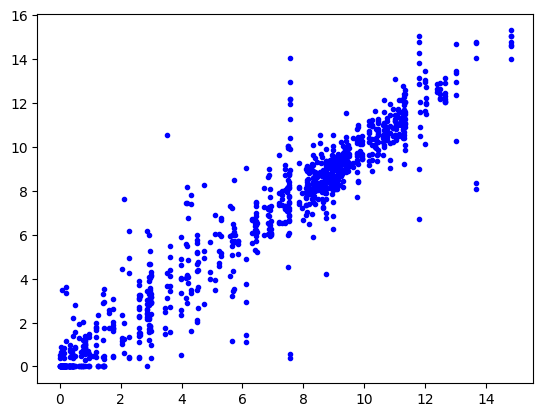

In [73]:
# 대치값과 원래값의 비교
naidx = data.isna().to_numpy().reshape(np.prod(data.shape))
imputed = data_clean.to_numpy().reshape(np.prod(data.shape))[naidx]
original = data_org.to_numpy().reshape(np.prod(data.shape))[naidx]
plt.plot(imputed,original,'b.')

### 이상치 검출

In [74]:
data = data_org.copy()  # 결측치가 없는 데이터에서 시작, 결측치 처리 후 시작도 가능

In [75]:
sp.stats.zscore(data)   # z-score, (value-mean)/std

,val0001,val0002,val0003,val0004,val0005,val0006,val0007,val0008,val0009,val0010,...,val1991,val1992,val1993,val1994,val1995,val1996,val1997,val1998,val1999,val2000
0,0.510580,-0.403123,-0.581526,0.503947,-0.176936,0.322917,-0.044992,0.382163,-0.27416,0.468358,...,-0.396901,1.097817,-1.152651,-0.017877,1.438820,1.079534,1.205177,1.067848,-1.049578,0.344785
1,0.948903,-0.403123,0.479087,0.734540,-0.378268,-1.798543,-0.008042,0.513892,-0.27416,1.339550,...,0.078426,-0.313032,0.733729,0.121188,1.198375,-0.389269,1.586032,0.377812,0.298327,0.011793
2,-0.361402,-0.403123,-0.178876,0.434232,0.361147,-0.083343,0.471344,0.418666,-0.27416,0.408750,...,0.918747,0.449631,0.434811,0.223974,-0.075856,0.513336,-0.335081,0.430621,-1.455822,-0.570146
3,-2.365561,-0.403123,0.781637,-0.632931,0.433261,-0.347303,-0.429084,-0.982734,-0.27416,1.428962,...,-0.179813,1.111740,-0.916612,0.560551,0.403749,0.365317,-0.845477,0.810845,-1.246148,-0.011612
4,1.667006,-0.403123,-0.581526,0.406079,1.818113,0.154547,-0.671208,-0.982734,-0.27416,-0.340934,...,1.355308,-1.346418,-1.037533,-1.141477,0.420464,0.092051,1.053613,-0.313984,1.181954,-0.570146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.975986,-0.403123,1.739900,0.290782,-0.941476,-0.258230,-0.679960,1.197928,-0.27416,-1.196079,...,-0.115999,-0.591489,0.805315,-0.215389,-0.969489,-2.154109,-0.346739,-0.914245,-0.585300,0.891616
196,0.601975,-0.403123,0.247394,0.457024,-0.479750,1.145213,1.612924,3.119893,-0.27416,0.085492,...,0.215597,1.888326,1.422500,-0.132756,0.723914,1.452168,-0.164085,0.890059,-0.699497,-0.570146
197,-1.093493,-0.403123,-0.581526,1.777571,0.407482,-0.195228,0.102810,0.834484,-0.27416,-1.301539,...,-0.767859,0.383111,-1.494134,-1.884162,0.055296,0.037191,-0.065633,0.546801,-1.459566,-0.049912
198,0.375353,-0.403123,-0.581526,-0.430492,-0.481708,-0.210435,0.870022,-0.982734,-0.27416,0.408750,...,0.522144,2.163689,-0.175603,1.264943,-0.459025,0.841461,0.359266,2.124026,0.685850,-0.039273


In [95]:
# 3sigma (99.73%) 바깥 쪽의 것을 이상치로 검출
outlier_idx = np.abs( sp.stats.zscore(data) ) > 3
print('# of outliers:', outlier_idx.sum().sum() )

# of outliers: 3468


In [101]:
outlier_idx['val0002'].sum()

4

<Axes: >

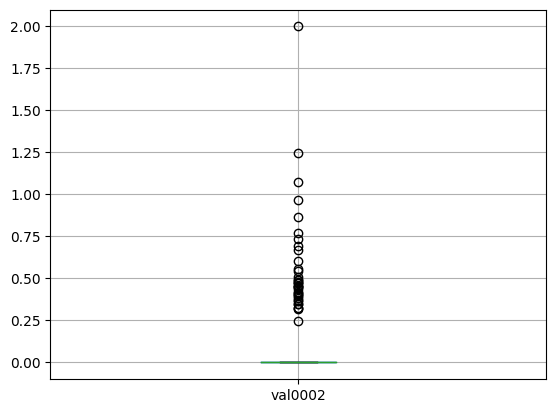

In [100]:
data.boxplot('val0002')

array([[<Axes: title={'center': 'val0002'}>]], dtype=object)

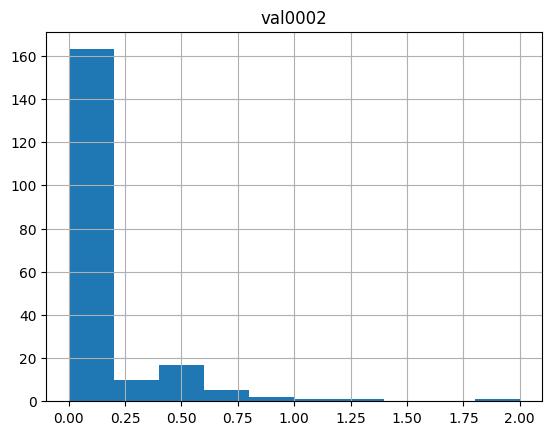

In [102]:
data.hist('val0002')

## 통계분석

###데이터 읽기

In [ ]:
df = pd.read_csv('data03_carseat.csv')

In [ ]:
df

,Sales,SalesBin,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Dummy01,Dummy02,Dummy03,Dummy04,Dummy05,Dummy06
0,9.50,High,138,73,11,276,120,Bad,42,17,Yes,Yes,38,7,8,16,105,41
1,11.22,High,111,48,16,260,83,Good,65,10,Yes,Yes,21,5,23,12,155,22
2,10.06,High,113,35,10,269,80,Medium,59,12,Yes,Yes,29,7,3,26,195,27
3,7.40,Low,117,100,4,466,97,Medium,55,14,Yes,Yes,81,7,40,23,131,10
4,4.15,Low,141,64,3,340,128,Bad,38,13,Yes,No,71,7,7,11,129,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.58,Low,134,25,10,237,148,Medium,59,13,Yes,Yes,85,6,26,26,163,12
96,9.48,High,147,42,10,407,132,Good,73,16,No,Yes,49,9,6,26,104,12
97,7.45,Low,161,82,5,287,129,Bad,33,16,Yes,Yes,13,5,32,25,178,5
98,12.49,High,122,77,24,382,127,Good,36,16,No,Yes,82,5,18,27,119,46


###T-검정

In [ ]:
y = df['Sales']
x = df['Urban']
y1 = y[x=='Yes']
y2 = y[x=='No']
sp.stats.ttest_ind(y1,y2)

Ttest_indResult(statistic=-1.2458389877357352, pvalue=0.21579373279136355)

<Axes: title={'center': 'Sales'}, xlabel='Urban'>

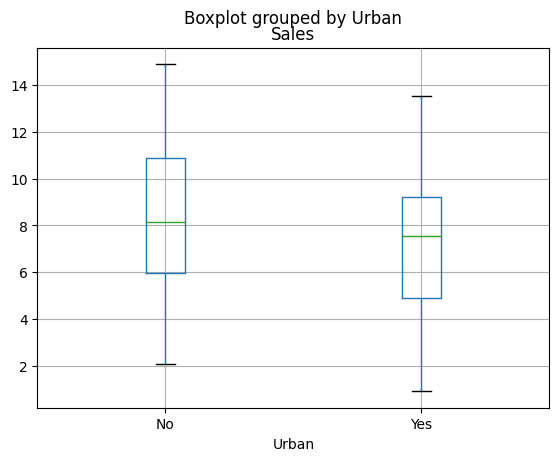

In [ ]:
df.boxplot('Sales',by='Urban')

### F-검정, ANOVA

In [ ]:
y = df['Sales']
x = df['ShelveLoc']
y1 = y[x=='Good']
y2 = y[x=='Medium']
y3 = y[x=='Bad']
sp.stats.f_oneway(y1,y2,y3)

F_onewayResult(statistic=30.84136704786565, pvalue=4.292792406043025e-11)

<Axes: title={'center': 'Sales'}, xlabel='ShelveLoc'>

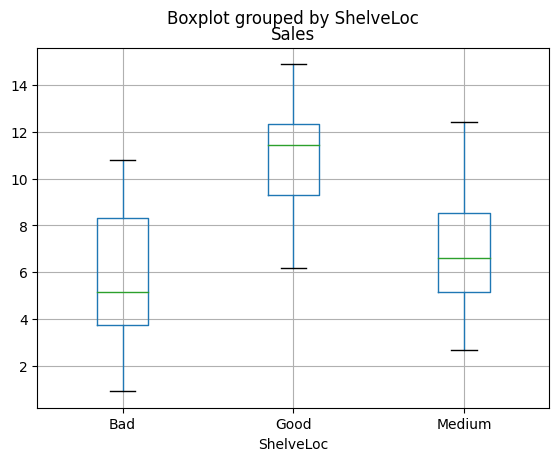

In [ ]:
df.boxplot('Sales',by='ShelveLoc')

###상관검정

In [ ]:
y = df['Sales']
x = df['CompPrice']
sp.stats.pearsonr(y,x)

PearsonRResult(statistic=0.21681873029884507, pvalue=0.03025217080171125)

<Axes: xlabel='Sales', ylabel='CompPrice'>

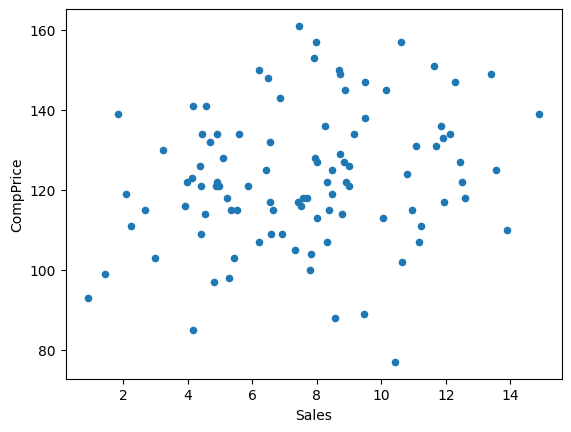

In [ ]:
df.plot.scatter('Sales','CompPrice')

###카이제곱 검정

In [ ]:
# chisq test
y = df['SalesBin']
x = df['US']
tbl = pd.crosstab(x,y)
scipy.stats.chi2_contingency(tbl)

Chi2ContingencyResult(statistic=3.6288178902779946, pvalue=0.056787137719661575, dof=1, expected_freq=array([[17.1, 20.9],
       [27.9, 34.1]]))

In [ ]:
tbl

SalesBin,High,Low
US,,
No,12,26
Yes,33,29


###모든 변수에 대해서 한 번에 수행

In [ ]:
# all at once
Y = df['Sales']
X = df.iloc[:,2:-6]
out = pd.DataFrame({"Var":X.columns})
slist = np.zeros(out.shape[0])
plist = np.zeros(out.shape[0])
for i in range(out.shape[0]):
    y = Y
    x = X.iloc[:,i]
    if (x.dtype=='O') and (y.dtype=='O'):  # Object type
        r = sp.stats.chi2_contingency( pd.crosstab(x,y) )
        s = r[0]
        p = r[1]
    elif (x.dtype!='O') and (y.dtype!='O'):
        r = sp.stats.pearsonr(x,y)
        s = r[0]
        p = r[1]
    else:
        if (x.dtype!='O') and (y.dtype=='O'):
            x, y = y, x
        # now x is categorical, y is numeric
        n = x.unique()
        ylist = []
        for j in range(len(n)):
            ylist.append(y[x==n[j]])
        if len(n)==2:
            r = sp.stats.ttest_ind(*ylist)
            s = r.statistic
            p = r.pvalue
        else:
            r = sp.stats.f_oneway(*ylist)
            s = r.statistic
            p = r.pvalue
    slist[i] = s
    plist[i] = p
out['stat'] = slist
out['pvalue'] = plist

In [ ]:
out

,Var,stat,pvalue
0,CompPrice,0.216819,3.025217e-02
1,Income,0.212973,3.338467e-02
2,Advertising,0.333760,6.900811e-04
3,Population,0.117909,2.426660e-01
4,Price,-0.344771,4.435662e-04
5,ShelveLoc,30.841367,4.292792e-11
6,Age,-0.285571,3.976277e-03
7,Education,0.016902,8.674470e-01
8,Urban,-1.245839,2.157937e-01
9,US,1.993680,4.896627e-02


###파일로 출력

In [ ]:
# write to a file
out.to_csv('analysis_result.csv',index=False)

## 연습문제

1. data05_stock_missing에서 결측치를 각 변수의 평균을 이용하여 대치하였을 때, 실제값(data04_stock)과의 MSE(제곱에러의 평균)은 어떻게 주어지는가? 각 변수의 중간값의 이용하여 대치하였을 때 MSE는 어떻게 주어지는가?

2. data04_stock은 주가가 상승한 날과 하락한 날에 대하여 관련된 변수의 값을 모아놓은 파일이다. 2000개의 관련 변수 중에서 주가의 변동과 유의미하게 연관된 변수를 선정하고자.<br>
(1) SMD의 절대값이 큰 순서대로 변수 10개를 선정하시오.<br>
(2) p 값이 0.01보다 작은 변수는 모두 몇 개인가?